In [0]:
!pip install docx2txt
import pandas as pd
import numpy as np
import string
import nltk
import array
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
nltk.download('punkt')
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
from collections import Counter,OrderedDict
import math
from dateutil import parser
nltk.download('wordnet')
import docx2txt
from matplotlib import pyplot as plt


  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3965 sha256=dd3934563cdf8f647590aba88f625b48761734fcd1c731b43452fe564a3314be
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
data = pd.read_csv("hn2018_2019.csv",
                   index_col=["Created At"], 
                   usecols = ["Title", "Post Type", "Created At"],
                   parse_dates = ["Created At"])

filteredData2018 = data.loc[data.index < '2019-01-01 00:00:00']

ngram_vectorizer = CountVectorizer(analyzer = 'word',ngram_range=(1,1),min_df=1)
X = ngram_vectorizer.fit_transform(filteredData2018.Title)
# vocab = ngram_vectorizer.get_feature_names()
# counts = X.sum(axis=0).A1
# freq_distribution = Counter(dict(zip(vocab,counts)))
filteredData2018 = filteredData2018[0:10000]


filteredData2019 = data.loc[data.index >= '2019-01-01 00:00:00']
filteredData2019 = filteredData2019[0:10000]
# regex = re.compile('[%s]' % re.escape(string.punctuation))


In [0]:
index = data.index >= '2019-01-01 00:00:00'
index2019 = 0
for i in range(len(index)):
  if index[i] == True:
    index2019 = i
    break

my_text = docx2txt.process("Stopwords.docx")
# stopWords = "".join(my_text)
stopWords = my_text.split("\n")
# stopWords = stopWords.remove("")
# print(stopWords[2])

In [0]:
story = {}
poll = {}
show = {}
ask = {}
classStory = np.array([])
classPoll = np.array([])
classShow = np.array([])
classAsk = np.array([])
wordFreq = {}
d = {}
words = np.array([])
final_tokens = []
f = np.array([])
removed = []
for i in range(len(filteredData2018)):  
  Tokens = data['Title'][i].lower().split()
  for word in Tokens:
    if word == '' or word in string.punctuation:
        removed.append(word)
        continue
    temp1   = word.split('\s+|[,- ]\s*')
    for w in temp1:
#       w = regex.sub('', w)
      if w.isnumeric() or w == '':
        removed.append(word)
        continue
      if w == 'ask' or w == 'show' :
        index = Tokens.index(w)+1
        if index<len(Tokens) and Tokens[index] == 'hn:':
          f=np.append(f,w+' hn') 
          continue
      if w.isalpha() and len(w)>0:
        f=np.append(f,w)

# print(f)
for word in f: 
    d[word] = d.get(word, 0) + 1

for i in range(len(filteredData2018)):
  if data['Post Type'][i] == 'story':
    word1 = data['Title'][i].lower().split()
    for w in word1:
      if len(w)>0 and not w.isnumeric():
        classStory=np.append(classStory,w)
        if w not in story:
          story[w] = 1
        else:
          story[w] += 1


  elif data['Post Type'][i] == 'ask_hn':
    word2 = data['Title'][i].lower().split()
    
    for w in word2:
      if w == 'ask':
        index = word2.index(w)+1
        if word2[index] == 'hn:':
          w = w +' hn'
          if w not in ask:
            ask[w] = 1
          else:
            ask[w] += 1
          continue
      if len(w)>0 and not w.isnumeric():
        classAsk=np.append(classAsk,word2)
        if w not in ask:
          ask[w] = 1
        else:
          ask[w] += 1
  
  elif data['Post Type'][i] == 'show_hn':
    word3 = data['Title'][i].lower().split()
    
    for w in word3:
       if w == 'show':
        index = word3.index(w)+1
        if word3[index] == 'hn:':
          w = w +' hn'
          if w not in show:
            show[w] = 1
          else:
            show[w] += 1
          continue
     
       if len(w)>0 and not w.isnumeric():
        classShow=np.append(classShow,word3)
        if w not in show:
          show[w] = 1
        else:
          show[w] += 1
    
  elif data['Post Type'][i] == 'poll':
    word4 = data['Title'][i].lower().split()
    
    for w in word4:
      if len(w)>0 and not w.isnumeric():
        classPoll=np.append(classPoll,word4)
        if w not in poll:
          poll[w] = 1
        else:
          poll[w] += 1
  
fileRemoved = open("remove_word.txt","w+")
for removedWord in removed:
    fileRemoved.write(removedWord+"\r\n")
fileRemoved.close()

print(removed)
print(len(classStory))
print(show['show hn'])
print(d['show hn'])

['2017', '3', '3', '37000', '7', '2017', '34', '2018', '2017', '3', '2017', '2017', '2017', '2018', '2018', '2017', '2018', '2018', '2018', '3310', '5', '2017', '2017', '2017', '2017', '1500', '5', '2017', '2018', '2018', '52', '40', '2018', '2017', '3', '2017', '2017', '10', '1', '400', '000', '000', '50', '2018', '2', '2019', '2017', '2017', '657', '2018', '1960', '2013', '2018', '2018', '200', '2018', '2017', '2018', '2017', '2017', '2018', '2018', '2017', '2018', '2017', '2017', '2017', '2018', '140', '6', '2017', '18', '2018', '2', '&', '747', '32', '2017', '4', '2018', '7', '2', '10', '99', '2017', '2018', '67', '2017', '2017', '2028', '2017', '2018', '300', '100', '2018', ',', '2018', '-', '13', '2017', '2018', '7', '2050', '2017', '2018', '26', '10', '11', '30', '2017', '219', '2017', '2017', '&', '-', '&', '3', '3', '3', '10', '2017', '2017', '2018', '2018', '-', '7', '5145', '5', '50', '100', '10', '12', '2018', '9', '2018', '2018', '2', '2017', '2017', '2018', '2017', '5', '

In [0]:
def conditionalProb(d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,status,f):
    dfValues = []
    if status == "firstTask":
        file = open("model-2018.txt","w+")
    elif status == "stopTask":
        file = open("stopword-model.txt","w+")
    elif status == "filterWord":
        file = open("wordlength-model.txt","w+")
        
    pStory = len(classStory) / len(filteredData2018) 
    pPoll = len(classPoll) / len(filteredData2018)
    pShow = len(classShow) / len(filteredData2018)
    pAsk = len(classAsk) / len(filteredData2018)

    wordCondFreqStory = {}
    wordCondFreqPoll = {}
    wordCondFreqShow = {}
    wordCondFreqAsk = {}
    probWord = {}
    w = []
    count = 0
    
    for word in d.keys():
      count = count + 1
      if word not in story:
          story[word] = 0
          wordCondFreqStory[word] = 0
      else:
          wordCondFreqStory[word] =  (story.get(word) + delta) / ((len(classStory) + len(d)) * delta)
       
      if word not in show:
          show[word] = 0
          wordCondFreqShow[word] = 0
      else:
          wordCondFreqShow[word] = (show.get(word) + delta) / ((len(classShow) + len(d)) * delta)
        
      if word not in ask:
          ask[word] = 0
          wordCondFreqAsk[word] = 0
      else:
         wordCondFreqAsk[word] = (ask.get(word) + delta) / ((len(classAsk) + len(d)) * delta)
        
      if word not in poll:
          poll[word] = 0
          wordCondFreqPoll[word] = 0
      else:
         wordCondFreqPoll[word] = (poll.get(word) + delta) / ((len(classPoll) + len(d)) * delta)
      # if status == "filterWord":   
      dfValues.append((word,str(story[word]),str(wordCondFreqStory.get(word)),str(ask[word]),str(wordCondFreqAsk.get(word)),str(show[word]),str(wordCondFreqShow.get(word)),str(poll[word]),(wordCondFreqPoll.get(word))))
      # print(str(count)+"  " + word + "  " + str(story[word]) +"  " +str(wordCondFreqStory.get(word)) +"  " + str(ask[word]) +"  " +str(wordCondFreqAsk.get(word)) +"  "+str(show[word]) +"  " +str(wordCondFreqShow.get(word)) +"  " +str(poll[word]) +"  " +str(wordCondFreqPoll.get(word)))
    if status != 'freq':
      dfFile = pd.DataFrame(dfValues, columns = ['Word', 'storyCount','storyProb','askCount','askProb','showCount','showProb','pollCount', 'pollProb'])
      dfFile = dfFile.sort_values(by = 'Word')
      counter = 0
      for index, row in dfFile.iterrows():
          counter = counter + 1
          file.write(str(counter)+ "  "+row['Word']+"  "+str(row['storyCount'])+"  "+str(row['storyProb'])+"  "+str(row['askCount'])+"  "+str(row['askProb'])+"  "+str(row['showCount'])+"  "+str(row['showProb'])+"  "+str(row['pollCount'])+"  "+str(row['pollProb'])+"\r\n")
        
      file.close()
    
    classfier(wordCondFreqStory,wordCondFreqPoll,wordCondFreqShow,wordCondFreqAsk,pStory,pShow,pPoll,pAsk,d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,status,f)
    
    
    # f.write(str(count)+"  " + word + "  " + str(story[word]) +"  " +str(wordCondFreqStory.get(word)) +"  " + str(ask[word]) +"  " +str(wordCondFreqAsk.get(word)) +"  "+str(show[word]) +"  " +str(wordCondFreqShow.get(word)) +"  " +str(poll[word]) +"  " +str(wordCondFreqPoll.get(word)))
    # print(len(wordCondFreqStory))
    # print(len(wordCondFreqPoll))


In [0]:
def classfier(wordCondFreqStory,wordCondFreqPoll,wordCondFreqShow,wordCondFreqAsk,pStory,pShow,pPoll,pAsk,d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,status,f11):
    f =np.array([])
    probWords = {}
    
    bayesianStory = {}
    bayesianShow = {}
    bayesianAsk = {}
    bayesianPoll = {}
    count = 0
    for i in range(index2019,index2019+len(filteredData2019)):  
      Tokens = data['Title'][i].lower().split()
      for word in Tokens:
        if word == '' or word in string.punctuation:
          continue
        temp1   = word.split('\s+|[,- ]\s*')
        for w in temp1:
#           w = regex.sub('', w)
          if w.isnumeric() or w == '':
            continue
          if w == 'ask' or w == 'show' :
            index = Tokens.index(w)+1
            if index<len(Tokens) and Tokens[index] == 'hn:' :
              f=np.append(f,w+' hn') 
              continue
        
          if w.isalpha() and len(w)>0:
            f=np.append(f,w)


    for word in f:
     if word not in wordCondFreqStory:
          wordCondFreqStory[word] = 0
     if word not in wordCondFreqPoll:
          wordCondFreqPoll[word] = 0
     if word not in wordCondFreqShow:
          wordCondFreqShow[word] = 0
     if word not in wordCondFreqAsk:
          wordCondFreqAsk[word] = 0
      
     probWords[word] = wordCondFreqStory.get(word)*pStory + wordCondFreqPoll.get(word)*pPoll + wordCondFreqAsk.get(word)*pAsk + wordCondFreqShow.get(word)*pShow
    # print(probWords)
     if  probWords.get(word) != 0:
          bayesianStory[word] = ((wordCondFreqStory.get(word))*pStory)/probWords.get(word)
          bayesianShow[word] = ((wordCondFreqShow.get(word))*pShow)/probWords.get(word)
          bayesianAsk[word] = ((wordCondFreqAsk.get(word))*pAsk)/probWords.get(word)
          bayesianPoll[word] = ((wordCondFreqPoll.get(word))*pPoll)/probWords.get(word)
     else:
          bayesianStory[word] = 0
          bayesianShow[word] = 0
          bayesianAsk[word] = 0
          bayesianPoll[word] = 0
    # print(bayesianStory['the'])      
    printClassifier(bayesianStory,bayesianShow,bayesianAsk,bayesianPoll,filteredData2019,d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,status,f11)


def printClassifier(bayesianStory,bayesianShow,bayesianAsk,bayesianPoll,filteredData2019,d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,status,f11):
  count = 0
  testData = []
  prediction = []
  accuracy = 0
  right = 0
  wrong = 0
  if status == "firstTask":
    file = open("baseline-result.txt","a+")
  elif status == "stopTask":
     file = open("stopword-result.txt","a+")
  elif status == "filterWord":
     file = open("wordlength-result.txt","a+")
      

  for i in range (index2019,index2019+len(filteredData2019)):
    x=0
    y=0
    z=0
    k=0
    result = []
    testData.append(data['Post Type'][i])
    count = count + 1
    word = data.Title[i].split()
    for j in range(len(word)):
        word[j] = word[j].lower()
    for w in word:
      if w == 'ask' or w == 'show' :
        index = word.index(w)+1
        if index<len(word) and  word[index] == 'hn:':
          w = w + ' hn'
          # f=np.append(f,w+' hn') 
      
      if w not in bayesianStory:
        bayesianStory[w] = 0
      # if bayesianStory[w]>0:  
      #   x = (x) + math.log10(bayesianStory.get(w))
      # else:
      x = (x) + bayesianStory.get(w)

      if w not in bayesianShow:
        bayesianShow[w] = 0
      # if bayesianShow[w] > 0:  
      #   y = (y) + math.log10(bayesianShow.get(w))
      # else:
      y = (y) + bayesianShow.get(w)

      if w not in bayesianAsk:
        bayesianAsk[w] = 0
      # if bayesianAsk[w] > 0:
      #   z = (z) + math.log10(bayesianAsk.get(w))
      # else:
      z = (z) + bayesianAsk.get(w)
      
      if w not in bayesianPoll:
        bayesianPoll[w] = 0
      # if bayesianPoll[w]>0:  
      #   k = k + math.log10(bayesianPoll.get(w))
      # else:
      k = k + bayesianPoll.get(w)
    
    result.append(x)
    result.append(y)
    result.append(z)
    result.append(k)
    t = max(result)
    if t==x and t!=0:
      tt = 'story'
    elif t==y and t!=0:
      tt = 'show_hn'
    elif t==z and t!=0:
      tt = 'ask_hn'
    elif t==k and t!=0:
      tt = 'poll'
    else:
      tt = 'not classified'
    
    prediction.append(tt)

    if str(data['Post Type'][i]) == str(tt).lower():
        right = right + 1
    else:
        wrong = wrong + 1
    
    if status != 'freq':
      if str(data['Post Type'][i]) == str(tt).lower():
          file.write("\n" + str(count) + "  " + str(data['Title'][i]) + "  " + str(data['Post Type'][i])+"  "+str(x) + "  " + str(z) + "  " + str(y)+ "  " + str(k) + "  " + str(tt) + "  "+"right" )
      else:
          file.write("\n"+ str(count) + "  " + str(data['Title'][i]) + "  " + str(data['Post Type'][i])+"  "+str((x)) + "  " + str(z) + "  " + str(y)+ "  " + str(k) + "  " + str(tt) + "  "+"wrong")
  if status != 'freq':
    file.close()
  label = ['story','ask_hn','show_hn','poll','not classified']
  cm = confusion_matrix(testData,prediction,label)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  
  cax = ax.matshow(cm)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + label)
  ax.set_yticklabels([''] + label)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  fmt = '.2f' 
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()


  plt.show()
  # print("Right :",right)
  # print("Wrong :",wrong)


In [0]:
def removeStopWords(d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,f):
    
    print("Stop words removed ")
    stop = dict(d)
    x = classStory.tolist()
    y = classShow.tolist()
    z = classAsk.tolist()
    r = classPoll.tolist()
    xx = dict(story)
    yy = dict(show)
    zz = dict(ask)
    rr = dict(poll)
     

    for words in stopWords: 
      if words in stop:
        del stop[words]
      if words in x:
        x.remove(words)
      if words in z:
        z.remove(words)
      if words in y:
        y.remove(words)
      if words in r:
        r.remove(words)
      if words in xx:
        del xx[words]
      if words in zz:
        del zz[words]
      if words in rr:
        del rr[words]
      if words in yy:
        del yy[words]
    # print(len(x))
    # print(len(classStory))
    print(len(poll))
    print(len(rr))
    conditionalProb(stop,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"stopTask",f)
  

In [0]:
def wordLengthFiltering(d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,f):
    print(" Word length filtering ")
    filterWord = dict(d) 
    x = classStory.tolist()
    y = classShow.tolist()
    z = classAsk.tolist()
    r = classPoll.tolist()
    xx = dict(story)
    yy = dict(show)
    zz = dict(ask)
    rr = dict(poll)
    delete = []
    for word in list(filterWord):
      if len(word) <= 2 or len(word) >= 9:
        delete.append(word)
        del filterWord[word]
    
    for words in list(xx):
      if len(words) <= 2 or len(words) >= 9 :
        del xx[words]
    for words in list(zz):
      if len(words) <= 2 or len(words) >= 9:
        del zz[words]
    for words in list(rr):
      if len(words) <= 2 or len(words) >= 9:
        del rr[words]
    for words in list(yy):
      if len(words) <= 2 or len(words) >= 9:
        del yy[words]
    
    for word in x :
      if len(word) <= 2 or len(word) >= 9:
        x.remove(word)
    for word in y :
      if len(word) <= 2 or len(word) >= 9:
        y.remove(word)
    for word in z :
      if len(word) <= 2 or len(word) >= 9:
        z.remove(word)
    for word in r :
      if len(word) <= 2 or len(word) >= 9:
        r.remove(word)
    
    # print(len(x))
    # print(len(classStory))
    # print(delete)
    conditionalProb(filterWord,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"filterWord",f)



In [0]:
def infrequentWords(d,classStory,classShow,classAsk,classPoll,delta,show,ask,poll,story,stopWords,f):
    print("F",len(f))
    x = classStory.tolist()
    y = classShow.tolist()
    z = classAsk.tolist()
    r = classPoll.tolist()
    xx = dict(story)
    yy = dict(show)
    zz = dict(ask)
    rr = dict(poll)
    finfrequent = f.tolist()
    commonlist = f.tolist()
    commondict = dict(d)
    infrequentWords = dict(d)  
    removed = []
  
    print(" Words with frequency 1 removed ")
    for words in list(infrequentWords.keys()):
      if infrequentWords.get(words) == 1:
        removed.append(words)
        finfrequent.remove(words)
        del infrequentWords[words]
        if words in xx:
          del xx[words]
        elif words in yy:
          del yy[words]
        elif words in zz:
          del zz[words]
        elif words in rr:
          del rr[words]
        if words in x:
          x.remove(words)
        elif words in y:
          y.remove(words)  
        elif words in z:
          z.remove(words)  
        elif words in r:
          r.remove(words)  
             
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    print(len(finfrequent))

    print(" Words with frequency 5 or less removed ")
    for words in list(infrequentWords.keys()):
      if infrequentWords.get(words) <= 5:
        # print("Here")
        removed.append(words)
        finfrequent.remove(words)
        del infrequentWords[words]
        if words in xx:
          del xx[words]
        elif words in yy:
          del yy[words]
        elif words in zz:
          del zz[words]
        elif words in rr:
          del rr[words]
        if words in x:
          x.remove(words)
        elif words in y:
          y.remove(words)  
        elif words in z:
          z.remove(words)  
        elif words in r:
          r.remove(words)  
        
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    print(len(finfrequent))

    print(" Words with frequency 10 or less removed ")
    for words in list(infrequentWords.keys()):
      if infrequentWords.get(words) <= 10:
        # print("Here")
        removed.append(words)
        finfrequent.remove(words)
        del infrequentWords[words]
        if words in xx:
          del xx[words]
        elif words in yy:
          del yy[words]
        elif words in zz:
          del zz[words]
        elif words in rr:
          del rr[words]
        if words in x:
          x.remove(words)
        elif words in y:
          y.remove(words)  
        elif words in z:
          z.remove(words)  
        elif words in r:
          r.remove(words)

    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    print(len(finfrequent))
    

    print(" Words with frequency 15 or less removed ")
    for words in list(infrequentWords.keys()):
      if infrequentWords.get(words) <= 15:
        # print("Here")
        removed.append(words)
        finfrequent.remove(words)
        del infrequentWords[words]
        if words in xx:
          del xx[words]
        elif words in yy:
          del yy[words]
        elif words in zz:
          del zz[words]
        elif words in rr:
          del rr[words]
        if words in x:
          x.remove(words)
        elif words in y:
          y.remove(words)  
        elif words in z:
          z.remove(words)  
        elif words in r:
          r.remove(words)

    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    print(len(finfrequent))
    
    print(" Words with frequency 20 or less removed ")
    for words in list(infrequentWords.keys()):
      if infrequentWords.get(words) <= 20:
        # print("Here")
        removed.append(words)
        finfrequent.remove(words)
        del infrequentWords[words]
        if words in xx:
          del xx[words]
        elif words in yy:
          del yy[words]
        elif words in zz:
          del zz[words]
        elif words in rr:
          del rr[words]
        if words in x:
          x.remove(words)
        elif words in y:
          y.remove(words)  
        elif words in z:
          z.remove(words)  
        elif words in r:
          r.remove(words) 
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    print(len(finfrequent))

    remove = []
    remove = sorted(commondict, key=commondict.__getitem__, reverse=True)
    print(" Top 5% words removed ")
    r5 = int((len(remove)*5)/100)
    for i in range(r5):
      if remove[i] in commonlist:
        commonlist.remove(remove[i])
      if  remove[i] in commondict:
        del commondict[remove[i]]
      if remove[i] in xx:
        del xx[remove[i]]
      if remove[i] in yy:
        del yy[remove[i]]
      if remove[i] in zz:
        del zz[remove[i]]
      if remove[i] in rr:
        del rr[remove[i]] 
      if remove[i] in x:
        x.remove(remove[i])
      elif remove[i] in y:
        y.remove(remove[i])  
      elif remove[i] in z:
        z.remove(remove[i])  
      elif remove[i] in r:
        r.remove(remove[i]) 
    # print(len(rr))  
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)

    print(" Top 10% words removed ")   
    r5 = int((len(remove)*10)/100)
    for i in range(r5):
      if remove[i] in commonlist:
        commonlist.remove(remove[i])
      if  remove[i] in commondict:
        del commondict[remove[i]]
      if remove[i] in xx:
        del xx[remove[i]]
      if remove[i] in yy:
        del yy[remove[i]]
      if remove[i] in zz:
        del zz[remove[i]]
      if remove[i] in rr:
        del rr[remove[i]] 
      if remove[i] in x:
        x.remove(remove[i])
      elif remove[i] in y:
        y.remove(remove[i])  
      elif remove[i] in z:
        z.remove(remove[i])  
      elif remove[i] in r:
        r.remove(remove[i]) 
    # print(len(rr))  
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    
    print(" Top 15% words removed ")
    r5 = int((len(remove)*15)/100)
    for i in range(r5):
      if remove[i] in commonlist:
        commonlist.remove(remove[i])
      if  remove[i] in commondict:
        del commondict[remove[i]]
      if remove[i] in xx:
        del xx[remove[i]]
      if remove[i] in yy:
        del yy[remove[i]]
      if remove[i] in zz:
        del zz[remove[i]]
      if remove[i] in rr:
        del rr[remove[i]] 
      if remove[i] in x:
        x.remove(remove[i])
      elif remove[i] in y:
        y.remove(remove[i])  
      elif remove[i] in z:
        z.remove(remove[i])  
      elif remove[i] in r:
        r.remove(remove[i]) 
    # print(len(rr))  
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    
    print(" Top 20% words removed ")
    r5 = int((len(remove)*20)/100)
    for i in range(r5):
      if remove[i] in commonlist:
        commonlist.remove(remove[i])
      if  remove[i] in commondict:
        del commondict[remove[i]]
      if remove[i] in xx:
        del xx[remove[i]]
      if remove[i] in yy:
        del yy[remove[i]]
      if remove[i] in zz:
        del zz[remove[i]]
      if remove[i] in rr:
        del rr[remove[i]] 
      if remove[i] in x:
        x.remove(remove[i])
      elif remove[i] in y:
        y.remove(remove[i])  
      elif remove[i] in z:
        z.remove(remove[i])  
      elif remove[i] in r:
        r.remove(remove[i]) 
    # print(len(rr))  
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    
    print(" Top 25% words removed ")
    r5 = int((len(remove)*25)/100)
    for i in range(r5):
      if remove[i] in commonlist:
        commonlist.remove(remove[i])
      if  remove[i] in commondict:
        del commondict[remove[i]]
      if remove[i] in xx:
        del xx[remove[i]]
      if remove[i] in yy:
        del yy[remove[i]]
      if remove[i] in zz:
        del zz[remove[i]]
      if remove[i] in rr:
        del rr[remove[i]] 
      if remove[i] in x:
        x.remove(remove[i])
      elif remove[i] in y:
        y.remove(remove[i])  
      elif remove[i] in z:
        z.remove(remove[i])  
      elif remove[i] in r:
        r.remove(remove[i]) 
    # print(len(rr))  
    conditionalProb(commondict,x,y,z,r,0.5,yy,zz,rr,xx,stopWords,"freq",finfrequent)
    
    # print(commondicted)

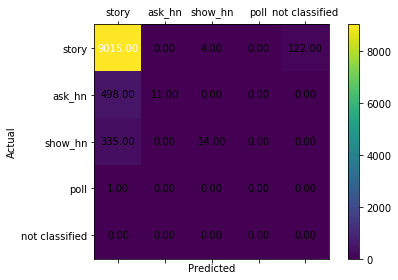

Stop words removed 
11383
11254


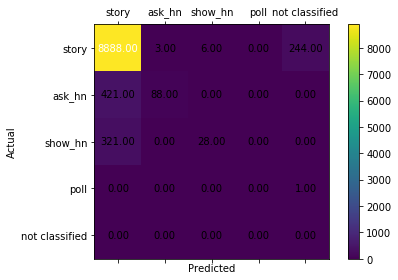

 Word length filtering 


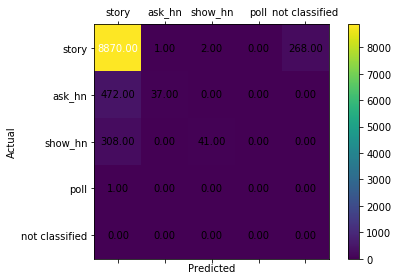

F 69847
 Words with frequency 1 removed 


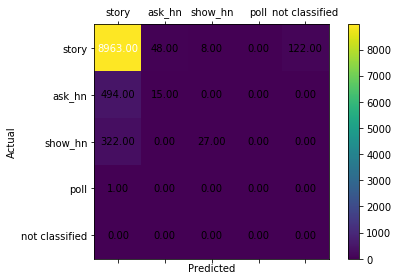

64026
 Words with frequency 5 or less removed 


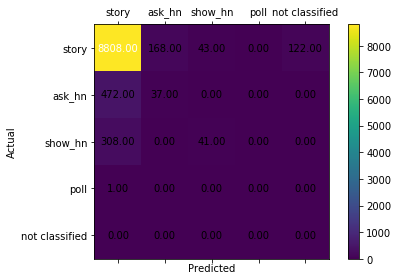

60319
 Words with frequency 10 or less removed 


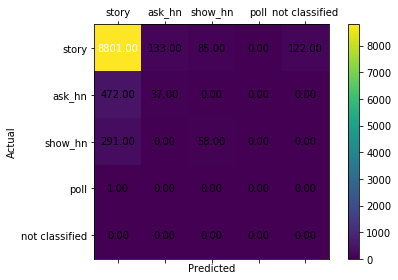

59445
 Words with frequency 15 or less removed 


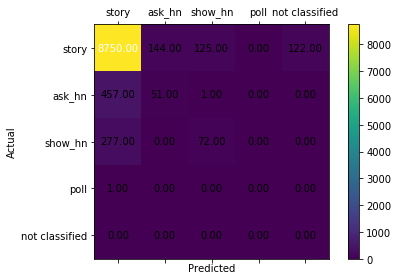

59096
 Words with frequency 20 or less removed 


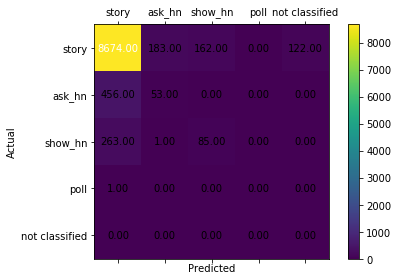

58927
 Top 5% words removed 


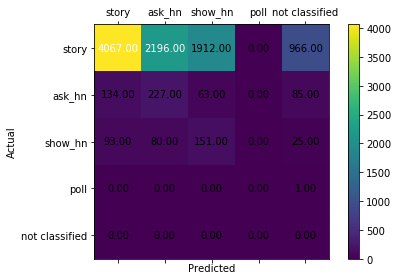

 Top 10% words removed 


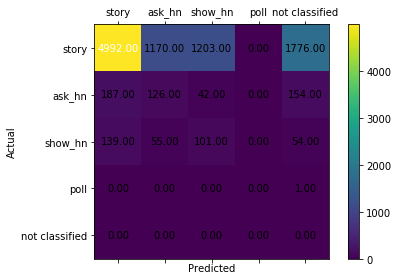

 Top 15% words removed 


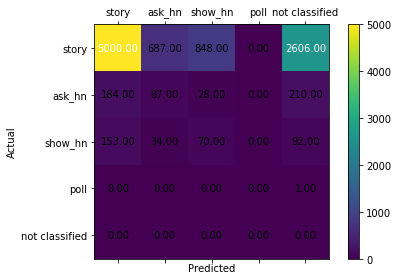

 Top 20% words removed 


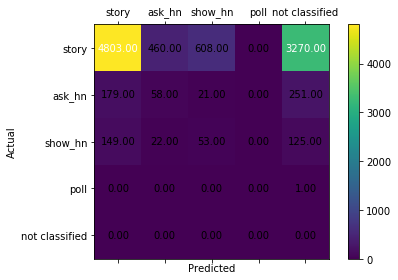

 Top 25% words removed 


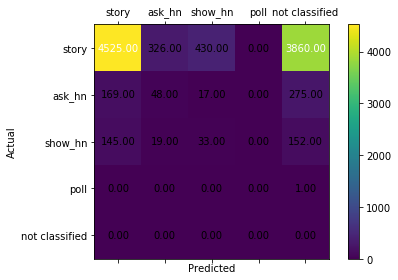

In [0]:
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.5,show,ask,poll,story,stopWords,"firstTask",f)
removeStopWords(d,classStory,classShow,classAsk,classPoll,0.5,show,ask,poll,story,stopWords,f)  
wordLengthFiltering(d,classStory,classShow,classAsk,classPoll,0.5,show,ask,poll,story,stopWords,f)
infrequentWords(d,classStory,classShow,classAsk,classPoll,0.5,show,ask,poll,story,stopWords,f)

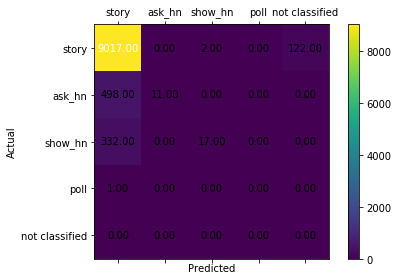

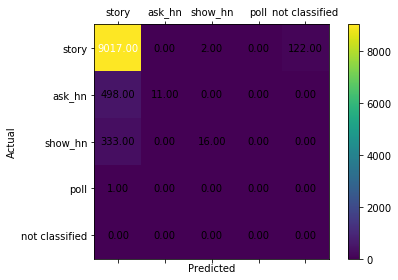

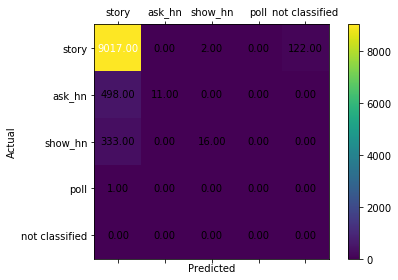

KeyboardInterrupt: ignored

In [0]:
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.1,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.2,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.3,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.4,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.5,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.6,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.7,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.8,show,ask,poll,story,stopWords,"firstTask",f)
conditionalProb(d,classStory,classShow,classAsk,classPoll,0.9,show,ask,poll,story,stopWords,"firstTask",f)
